In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import math
from sklearn.decomposition import PCA

## Adipose Data Loading and Processing

In [15]:
X = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/adi_filled.csv")

In [19]:
X = X.iloc[:, 1:].to_numpy()

In [20]:
df_adi = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Data sets for F2 mice/mlratio and intensity2 for F2 mice/Cleaned CSVs/adipose_mlratio_nqrank_final_cleaned.csv", index_col=False)

In [21]:
df_adi.iloc[:, 1:].shape, X.shape

((487, 31463), (487, 31463))

In [23]:
np.sum(np.isnan(X))

0

In [24]:
sex = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/adi_mlratio_nqrank_clean_sex.csv", delimiter=",")

In [25]:
y = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/adi_mlratio_clean_gluc_nqrank.csv", delimiter=",")

In [26]:
X_nonan = X[np.sum(np.isnan(X), axis=1) == 0]

In [27]:
y = y[~np.isnan(X).any(axis=1)]
sex = sex[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]

In [28]:
X.shape, y.shape, sex.shape

((487, 31463), (487, 4), (487,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=123, stratify=sex)

## Adipose Modeling

In [30]:
rmse = []
mape = []
pearson = []

In [31]:
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, y_predict)))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  pearson.append(pearsonr(y_test.flatten(), y_predict.flatten()))
  print(n, ":", math.sqrt(mean_squared_error(y_test, y_predict)), mean_absolute_percentage_error(y_test, y_predict), pearsonr(y_test.flatten(), y_predict.flatten()))

1 : 170.71352332147364 0.4432092053967432 (0.4795637429035865, 1.6493146847083015e-17)
2 : 147.0825031714502 0.39139578010009307 (0.569423086971086, 1.8274059897749623e-25)
3 : 136.3396191250113 0.37797211467667524 (0.6139095034057569, 2.157184386817636e-30)
4 : 131.14101578313858 0.3616059994046353 (0.6380295082853317, 2.0832682389886464e-33)
5 : 127.38177713399153 0.34723977118441623 (0.6625644541883354, 9.184897955938206e-37)
6 : 123.12513472759645 0.33998799988092104 (0.6900286768366601, 6.455604805877517e-41)
7 : 121.4210298679873 0.3405523007624396 (0.7022230981739481, 6.510472617295211e-43)
8 : 120.7237948370457 0.3444501182320925 (0.708689128627978, 5.167642213595622e-44)
9 : 121.01534107722823 0.3436499901904433 (0.7089679312839774, 4.625626313201624e-44)
10 : 121.05337156728972 0.34370435707987756 (0.70985553513317, 3.2477951718743625e-44)
11 : 121.58274121893427 0.34246792189137265 (0.7083658892909231, 5.87507004603195e-44)
12 : 121.08557897141978 0.3390969566242404 (0.71204

([<matplotlib.axis.XTick at 0x7fd9f898c4d0>,
 <a list of 20 Text major ticklabel objects>)

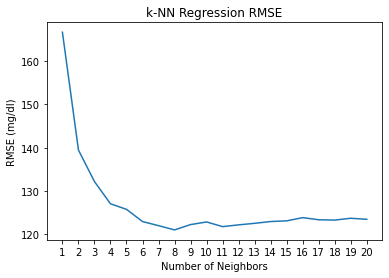

In [ ]:
plt.plot(range(1, 21), rmse)
plt.title("k-NN Regression RMSE")
plt.ylabel("RMSE (mg/dl)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f8ce5890>,
 <a list of 20 Text major ticklabel objects>)

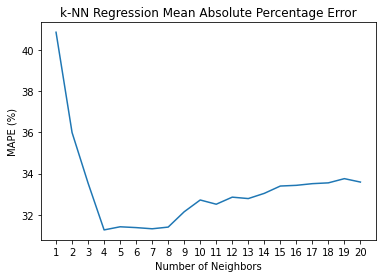

In [ ]:
plt.plot(range(1, 21), np.multiply(mape, 100))
plt.title("k-NN Regression Mean Absolute Percentage Error")
plt.ylabel("MAPE (%)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7f4a09ddeb90>,
 <a list of 20 Text major ticklabel objects>)

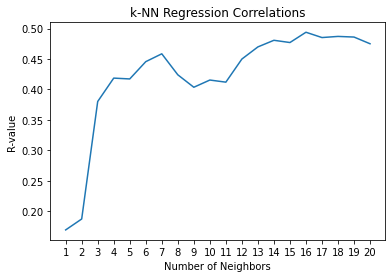

In [ ]:
plt.plot(range(1, 21), np.array(pearson)[:, 0])
plt.title("k-NN Regression Correlations")
plt.ylabel("R-value")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

## Gastrocnemius Data Loading and Processing

In [32]:
X = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/gas_filled.csv")
X = X.iloc[:, 1:].to_numpy()

In [33]:
sex = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/gas_mlratio_nqrank_clean_sex.csv", delimiter=",")

In [34]:
y = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/gas_mlratio_clean_gluc_nqrank.csv", delimiter=",")

In [35]:
X_nonan = X[np.sum(np.isnan(X), axis=1) == 0]

In [36]:
y = y[~np.isnan(X).any(axis=1)]
sex = sex[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]


In [37]:
X.shape, y.shape, sex.shape

((490, 31463), (490, 4), (490,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=123, stratify=sex)

## Gastrocnemius Modeling

In [39]:
rmse = []
mape = []
pearson = []

In [40]:
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, y_predict)))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  pearson.append(pearsonr(y_test.flatten(), y_predict.flatten()))
  print(n, ":", math.sqrt(mean_squared_error(y_test, y_predict)), mean_absolute_percentage_error(y_test, y_predict), pearsonr(y_test.flatten(), y_predict.flatten()))

1 : 170.69646839597283 0.47061455345900677 (0.503132093027599, 2.2567205446932583e-19)
2 : 140.92072857434206 0.41063947236919807 (0.5961368977962808, 2.4814821210777926e-28)
3 : 142.94119703587265 0.41242291093530453 (0.5758090218058728, 3.983015190381441e-26)
4 : 138.61776797940522 0.40489265996575013 (0.5855701818966983, 3.634906578607119e-27)
5 : 132.97059773592804 0.39169210171895746 (0.6178843880735169, 7.1600867933107934e-31)
6 : 130.00547885209843 0.38336955324027483 (0.6318473182207942, 1.3090384674584223e-32)
7 : 130.73441019469658 0.3766331231703564 (0.6259750035603475, 7.221201854203777e-32)
8 : 129.4020959755017 0.38043219866787237 (0.6349954544284349, 5.1611982647389846e-33)
9 : 129.26654067573463 0.3755064418462537 (0.6355390955997083, 4.390116686928363e-33)
10 : 129.07492546063335 0.37937258369272625 (0.6368958388690009, 2.9273885624633553e-33)
11 : 127.08403729927636 0.3741803018333936 (0.6508507520162347, 4.0168936740188654e-35)
12 : 125.84429906616187 0.3679707440583

([<matplotlib.axis.XTick at 0x7fd9f6fba810>,
 <a list of 20 Text major ticklabel objects>)

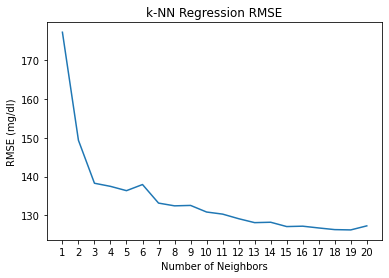

In [ ]:
plt.plot(range(1, 21), rmse)
plt.title("k-NN Regression RMSE")
plt.ylabel("RMSE (mg/dl)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f5da3cd0>,
 <a list of 20 Text major ticklabel objects>)

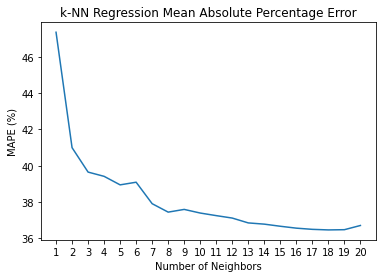

In [ ]:
plt.plot(range(1, 21), np.multiply(mape, 100))
plt.title("k-NN Regression Mean Absolute Percentage Error")
plt.ylabel("MAPE (%)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f5d929d0>,
 <a list of 20 Text major ticklabel objects>)

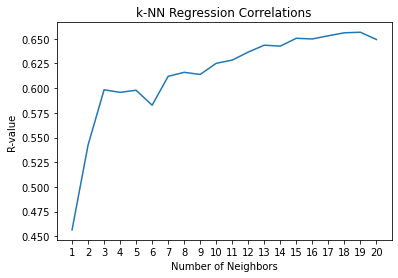

In [ ]:
plt.plot(range(1, 21), np.array(pearson)[:, 0])
plt.title("k-NN Regression Correlations")
plt.ylabel("R-value")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

## Islet Data Loading and Processing

In [41]:
X = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/islet_filled.csv")
X = X.iloc[:, 1:].to_numpy()

In [42]:
sex = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/islet_mlratio_nqrank_clean_sex.csv", delimiter=",")

In [43]:
y = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/islet_mlratio_clean_gluc_nqrank.csv", delimiter=",")

In [45]:
y = y[~np.isnan(X).any(axis=1)]
sex = sex[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]

In [46]:
X.shape, y.shape, sex.shape

((491, 31463), (491, 4), (491,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=123, stratify=sex)

## Islet Modeling

In [48]:
rmse = []
mape = []
pearson = []

In [49]:
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, y_predict)))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  pearson.append(pearsonr(y_test.flatten(), y_predict.flatten()))
  print(n, ":", math.sqrt(mean_squared_error(y_test, y_predict)), mean_absolute_percentage_error(y_test, y_predict), pearsonr(y_test.flatten(), y_predict.flatten()))

1 : 152.81880773849895 0.37885633336519275 (0.5678523320069501, 1.2055976028561907e-25)
2 : 126.27360709437768 0.31631855442541035 (0.6710464367998077, 1.6039458404553623e-38)
3 : 124.56361673001665 0.3204558088719345 (0.672299591498221, 1.038898575779957e-38)
4 : 124.35554873808672 0.32149469983637724 (0.667581832054016, 5.270877933535793e-38)
5 : 120.49968198168486 0.3079051940576736 (0.6895649725392543, 2.0908181231448538e-41)
6 : 117.0076522749841 0.3032574663041308 (0.7096272284341586, 8.705365401055165e-45)
7 : 117.55500139332928 0.3030915886363658 (0.7069248753442471, 2.5810962064906505e-44)
8 : 116.31379935423794 0.30740258459247316 (0.7139861247148268, 1.468565477999203e-45)
9 : 116.39127809608279 0.3084921405539409 (0.7134380936272771, 1.840181812706955e-45)
10 : 113.7803906599903 0.30221082460630533 (0.7297874137145803, 1.7352557270706017e-48)
11 : 114.12957990142742 0.30541520159843455 (0.7275700795500157, 4.5979450099713326e-48)
12 : 112.1876511873128 0.3002454607397789 (0

([<matplotlib.axis.XTick at 0x7fd9f7125110>,
 <a list of 20 Text major ticklabel objects>)

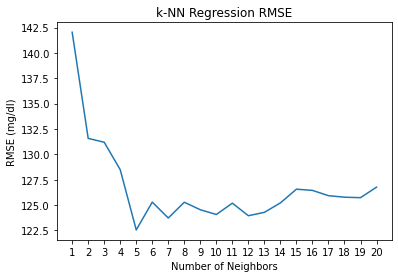

In [ ]:
plt.plot(range(1, 21), rmse)
plt.title("k-NN Regression RMSE")
plt.ylabel("RMSE (mg/dl)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9ecb6b1d0>,
 <a list of 20 Text major ticklabel objects>)

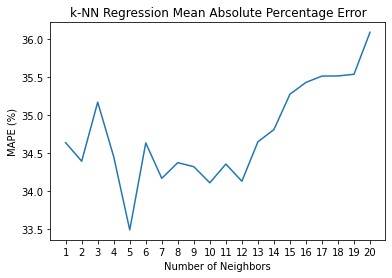

In [ ]:
plt.plot(range(1, 21), np.multiply(mape, 100))
plt.title("k-NN Regression Mean Absolute Percentage Error")
plt.ylabel("MAPE (%)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f889c8d0>,
 <a list of 20 Text major ticklabel objects>)

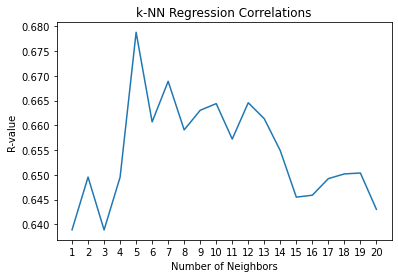

In [ ]:
plt.plot(range(1, 21), np.array(pearson)[:, 0])
plt.title("k-NN Regression Correlations")
plt.ylabel("R-value")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

## Liver Data Loading and Processing

In [51]:
X = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/liver_filled.csv")
X = X.iloc[:, 1:].to_numpy()

In [52]:
sex = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/liver_mlratio_nqrank_clean_sex.csv", delimiter=",")

In [53]:
y = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/liver_mlratio_clean_gluc_nqrank.csv", delimiter=",")

In [54]:
y = y[~np.isnan(X).any(axis=1)]
sex = sex[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]

In [55]:
X.shape, y.shape, sex.shape

((483, 31463), (483, 4), (483,))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=123, stratify=sex)

## Liver Modeling

In [57]:
rmse = []
mape = []
pearson = []

In [58]:
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, y_predict)))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  pearson.append(pearsonr(y_test.flatten(), y_predict.flatten()))
  print(n, ":", math.sqrt(mean_squared_error(y_test, y_predict)), mean_absolute_percentage_error(y_test, y_predict), pearsonr(y_test.flatten(), y_predict.flatten()))

1 : 189.7071963078516 0.4440260015025329 (0.38090864812219805, 5.834710831178616e-11)
2 : 153.75110910127412 0.39068814115242295 (0.5157949104557337, 3.6535493302693824e-20)
3 : 139.24648040225262 0.3560786299861014 (0.6042580838732967, 7.358224974224224e-29)
4 : 136.66882928648369 0.3634398103494333 (0.6119097892738583, 9.61278488601588e-30)
5 : 136.65665358655124 0.37353704746620414 (0.6063608734697011, 4.229026415354881e-29)
6 : 136.04063587927232 0.36984591008241896 (0.608469487549594, 2.4167910562803638e-29)
7 : 135.97435020395517 0.3756309112439223 (0.6088855624238676, 2.16309180810336e-29)
8 : 139.28998308674744 0.3827845537826196 (0.5866344021648222, 6.52357660408535e-27)
9 : 137.2112620190412 0.37887069904449544 (0.6021590676129677, 1.2738014389635728e-28)
10 : 136.89356989416208 0.37820419609894357 (0.604433219183055, 7.027613564207929e-29)
11 : 137.7297809678665 0.3809965729797947 (0.597436415176559, 4.314609958847064e-28)
12 : 137.86591263262585 0.38510444698208285 (0.59536

([<matplotlib.axis.XTick at 0x7fd9f8c461d0>,
 <a list of 20 Text major ticklabel objects>)

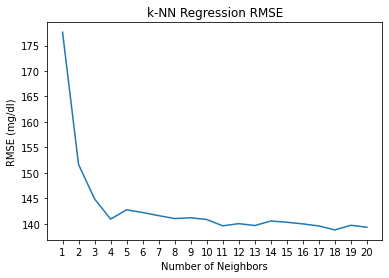

In [ ]:
plt.plot(range(1, 21), rmse)
plt.title("k-NN Regression RMSE")
plt.ylabel("RMSE (mg/dl)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f8ed3dd0>,
 <a list of 20 Text major ticklabel objects>)

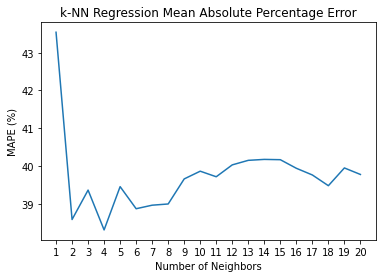

In [ ]:
plt.plot(range(1, 21), np.multiply(mape, 100))
plt.title("k-NN Regression Mean Absolute Percentage Error")
plt.ylabel("MAPE (%)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f98ac090>,
 <a list of 20 Text major ticklabel objects>)

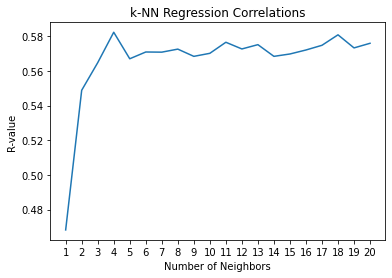

In [ ]:
plt.plot(range(1, 21), np.array(pearson)[:, 0])
plt.title("k-NN Regression Correlations")
plt.ylabel("R-value")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

## Kidney Data Loading and Processing

In [59]:
X = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/kid_filled.csv")
X = X.iloc[:, 1:].to_numpy()

In [60]:
sex = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/kid_mlratio_nqrank_clean_sex.csv", delimiter=",")

In [61]:
y = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/kid_mlratio_clean_gluc_nqrank.csv", delimiter=",")

In [62]:
y = y[~np.isnan(X).any(axis=1)]
sex = sex[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]

In [63]:
X.shape, y.shape, sex.shape

((474, 31463), (474, 4), (474,))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=123, stratify=sex)

## Kidney Modeling

In [65]:
rmse = []
mape = []
pearson = []

In [66]:
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, y_predict)))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  pearson.append(pearsonr(y_test.flatten(), y_predict.flatten()))
  print(n, ":", math.sqrt(mean_squared_error(y_test, y_predict)), mean_absolute_percentage_error(y_test, y_predict), pearsonr(y_test.flatten(), y_predict.flatten()))

1 : 172.60279187058478 0.49973208135532265 (0.4834743584235951, 2.4356053992490516e-17)
2 : 155.0487604839258 0.45790892564441893 (0.5207649828243717, 2.6149370476287837e-20)
3 : 145.95064035793635 0.43985736257786634 (0.5554741366758646, 2.0195810223758972e-23)
4 : 144.376510414202 0.4367356584491271 (0.557116289254364, 1.4089113518891597e-23)
5 : 142.08863304801335 0.4391655741667055 (0.5696558916248284, 8.427976796376276e-25)
6 : 141.3562341293341 0.43618950072307067 (0.5730561812056362, 3.8456726669810542e-25)
7 : 140.76554351327252 0.44189432280021573 (0.5754602584077081, 2.1961229882972734e-25)
8 : 141.93533639306585 0.4479291496955195 (0.5682728039441949, 1.1566468127398771e-24)
9 : 140.99874650392042 0.4474535633642899 (0.5736785171150209, 3.327955905394445e-25)
10 : 138.76284703330893 0.44589276678268663 (0.5902209825210438, 6.351488071636421e-27)
11 : 139.19170358535283 0.4482922118688143 (0.5864258928790478, 1.6070172008938737e-26)
12 : 140.10096925965144 0.4472409673993588 

([<matplotlib.axis.XTick at 0x7fd9f952a350>,
 <a list of 20 Text major ticklabel objects>)

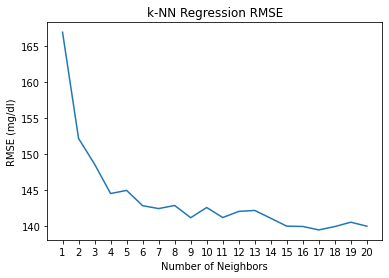

In [ ]:
plt.plot(range(1, 21), rmse)
plt.title("k-NN Regression RMSE")
plt.ylabel("RMSE (mg/dl)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9f8de99d0>,
 <a list of 20 Text major ticklabel objects>)

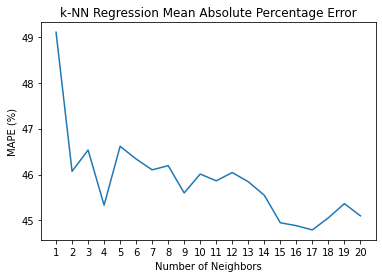

In [ ]:
plt.plot(range(1, 21), np.multiply(mape, 100))
plt.title("k-NN Regression Mean Absolute Percentage Error")
plt.ylabel("MAPE (%)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

([<matplotlib.axis.XTick at 0x7fd9eccc6710>,
 <a list of 20 Text major ticklabel objects>)

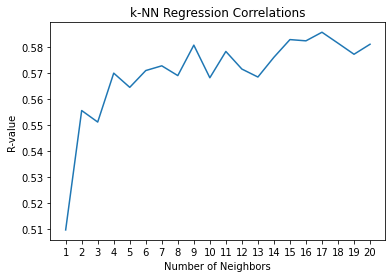

In [ ]:
plt.plot(range(1, 21), np.array(pearson)[:, 0])
plt.title("k-NN Regression Correlations")
plt.ylabel("R-value")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, 21, 1))

## Combined Model

In [ ]:
df_combo = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis Data/combined_mlratio_clean_nqrank.csv", index_col = False, header=None)

FileNotFoundError: ignored

In [ ]:
df_combo_gluc = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis Data/combined_mlratio_clean_gluc_nqrank.csv", header=None)

In [ ]:
df_combo_sex = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis Data/combined_mlratio_nqrank_clean_sex.csv", header=None)

In [ ]:
df_combo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,156290,156291,156292,156293,156294,156295,156296,156297,156298,156299,156300,156301,156302,156303,156304,156305,156306,156307,156308,156309,156310,156311,156312,156313,156314,156315,156316,156317,156318,156319,156320,156321,156322,156323,156324,156325,156326,156327,156328,156329
0,0.005588,-0.07914,0.03635,-0.4599,-0.26730,-0.009035,0.03713,0.04385,-0.016960,0.07965,-0.063240,-0.01602,0.04741,0.12750,-0.04447,0.006001,0.14110,-0.071990,-0.055620,-0.09195,0.06686,0.003838,0.144100,-0.01641,0.02689,-0.01941,0.023450,0.02701,0.041620,-0.2128,0.12090,-0.16850,-0.01064,-0.03692,-0.113800,0.05432,-0.017250,-0.04977,0.02160,0.06068,...,0.004875,0.545800,0.084770,-0.01950,-0.02107,-0.036010,0.279100,-0.062500,-0.09965,-0.15920,0.02211,0.375900,-0.01825,-0.029830,0.000674,-0.14490,0.006848,-0.03140,-0.086850,0.12450,0.083690,-0.068540,-0.207100,0.03813,0.06431,0.04126,0.09804,0.28020,0.063430,-0.18060,-0.22600,-0.115200,0.04348,-0.04478,-0.040310,0.07952,-0.005564,-0.02950,0.014673,0.030327
1,0.052350,0.06292,-0.07617,0.1488,0.10140,0.051560,-0.32410,0.05535,0.050330,-0.27030,-0.085270,0.01362,-0.01276,-0.07285,-0.20810,-0.071610,-0.07439,-0.089430,-0.172000,0.13020,-0.04866,0.151100,0.317800,-0.03765,0.04434,0.10740,-0.096320,0.01783,-0.103000,-0.1977,0.25930,0.19600,0.06699,-0.03467,0.356400,-0.12050,-0.140700,0.03994,0.16120,-0.07730,...,0.001762,-0.005006,0.023260,-0.01645,0.02219,-0.022280,0.067140,0.024190,-0.12290,0.04399,0.05205,0.084650,-0.07306,0.008908,-0.031910,-0.05769,0.040030,-0.03976,-0.008969,0.02446,-0.148200,0.000581,-0.008335,0.01205,0.06902,0.03765,-0.04856,-0.05630,0.032800,0.20270,0.01835,-0.052230,0.06982,0.02805,0.004088,-0.10730,0.054640,0.02862,-0.016195,-0.062269
2,0.099160,-0.07342,-0.10450,-0.4014,-0.39160,0.086660,-0.56440,-0.02893,0.111200,-0.23670,-0.007490,0.09845,0.14300,-0.16400,-0.01898,-0.076620,0.08824,-0.001899,-0.048190,0.07594,0.03205,0.165200,0.289000,-0.09405,0.12340,-0.08171,0.038420,-0.03907,-0.022730,-0.1573,0.12740,-0.00651,0.06755,0.12270,0.001644,0.06491,0.021620,0.12620,-0.07798,0.03856,...,0.019070,-0.034960,0.035870,-0.04865,0.01421,-0.023150,0.036580,-0.006384,-0.04935,0.02675,-0.06596,0.041420,-0.03194,-0.006667,-0.121300,0.08156,0.062490,0.02944,-0.015850,0.05970,-0.037010,0.064400,0.096290,-0.10980,0.08741,0.05438,-0.12370,-0.07611,0.041990,0.06790,-0.04193,-0.014010,0.05392,0.03605,0.007036,-0.15670,0.028280,0.01901,0.078329,-0.000838
3,0.207000,0.13780,-0.05988,-0.2806,-0.04846,0.050360,0.28660,-0.15490,0.005383,-0.08471,0.000726,0.03349,-0.01738,-0.01136,-0.04282,-0.131000,-0.04515,-0.003144,-0.006754,-0.05191,0.01477,0.065310,0.005452,-0.06014,-0.09194,-0.09785,0.031880,-0.14020,0.010030,-0.1406,-0.03587,0.05538,-0.04423,0.07573,0.012720,0.04560,0.022360,0.03359,-0.33140,0.14330,...,0.053420,-0.046830,0.002633,-0.00118,0.02886,0.007824,0.009698,-0.002060,-0.03247,0.20090,0.07658,0.164800,-0.00654,-0.017270,0.029920,0.07680,0.011800,-0.05736,-0.022650,-0.02208,-0.003962,-0.044200,-0.007093,0.07591,0.07962,0.02035,-0.03313,-0.11240,0.008652,0.20220,-0.05404,-0.035000,0.08519,0.04062,0.008094,-0.05582,0.014820,0.02622,0.012375,-0.015966
4,0.537200,-0.19780,0.03738,-0.2921,-0.23430,-0.026690,-0.32220,-0.06670,-0.008907,-0.05623,-0.062030,-0.05254,0.04454,0.07511,-0.04697,0.050560,-0.01305,0.152500,0.016520,0.01685,1.10800,0.019810,0.240500,-0.03518,0.04244,-0.06040,-0.002087,0.01741,-0.004364,-0.2609,0.01220,-0.06909,0.05610,-0.08551,-0.007993,0.03425,0.007311,-0.05947,0.04551,-0.02903,...,0.000288,0.037190,-0.018510,0.01455,0.01161,-0.184800,-0.050290,0.036060,-0.03499,0.07466,-0.08098,-0.004787,-0.02748,0.042680,-0.015210,-0.09522,0.041650,0.05565,-0.014690,0.02946,-0.070390,0.071370,-0.036460,-0.03671,0.03994,0.02415,-0.07611,-0.08032,0.044060,0.07293,0.08341,-0.007921,0.04394,0.03247,-0.006362,-0.11860,0.054570,0.03598,0.095285,-0.055295


In [ ]:
X = np.array(df_combo)

In [ ]:
y = np.array(df_combo_gluc)

In [ ]:
sex = np.array(df_combo_sex)

In [ ]:
y.shape

(427, 1)

In [ ]:
y = y[~np.isnan(X).any(axis=1)]
sex = sex[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=123, stratify=sex)

In [ ]:
rmse = []
mape = []
pearson = []

In [ ]:
max_neighbors = 20

In [ ]:
for n in range(1, max_neighbors):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, y_predict)))
  mape.append(mean_absolute_percentage_error(y_test, y_predict))
  pearson.append(pearsonr(y_test.flatten(), y_predict.flatten()))
  print(n, ":", math.sqrt(mean_squared_error(y_test, y_predict)), mean_absolute_percentage_error(y_test, y_predict), pearsonr(y_test.flatten(), y_predict.flatten()))

1 : 165.10642790518986 0.28148432608544244 (0.4320602736780193, 0.16072248746489642)
2 : 129.6380744311846 0.2784509423787817 (0.28624351367448814, 0.3670722413108505)
3 : 140.3696546035362 0.33824941107559686 (0.23672716008419947, 0.45882124988150236)
4 : 131.0462535033352 0.3204084733433698 (0.33567257168108344, 0.2861103382190483)
5 : 121.58186018810376 0.302844677850638 (0.43945071805208186, 0.1528887970832486)
6 : 123.74210982932055 0.30490802960816893 (0.35858773480117356, 0.25236973610592867)
7 : 121.02245342383239 0.29907286797955096 (0.4116645178668278, 0.18364263627502356)
8 : 121.51133667367984 0.2958917080001015 (0.43595185386834423, 0.156566457282225)
9 : 123.69887528361674 0.2964080657581995 (0.33707307280157156, 0.2839783187653065)
10 : 122.23361763102415 0.2908783928733249 (0.3893571892019527, 0.21092185419026122)
11 : 122.75676042720339 0.29026823427911114 (0.3849592915562227, 0.21657438997667833)
12 : 120.20136578043031 0.2816383483299067 (0.39579944397649286, 0.20280

([<matplotlib.axis.XTick at 0x7f2aee7a8a50>,
 <a list of 19 Text major ticklabel objects>)

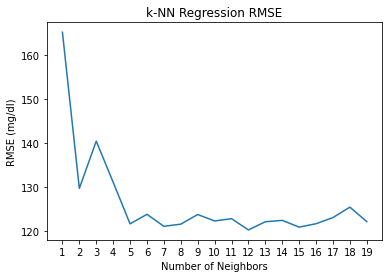

In [ ]:
plt.plot(range(1, max_neighbors), rmse)
plt.title("k-NN Regression RMSE")
plt.ylabel("RMSE (mg/dl)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, max_neighbors, 1))

([<matplotlib.axis.XTick at 0x7f2ae6c44390>,
 <a list of 19 Text major ticklabel objects>)

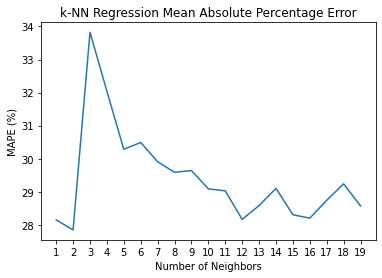

In [ ]:
plt.plot(range(1, max_neighbors), np.multiply(mape, 100))
plt.title("k-NN Regression Mean Absolute Percentage Error")
plt.ylabel("MAPE (%)")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, max_neighbors, 1))

([<matplotlib.axis.XTick at 0x7f2b086abc90>,
 <a list of 19 Text major ticklabel objects>)

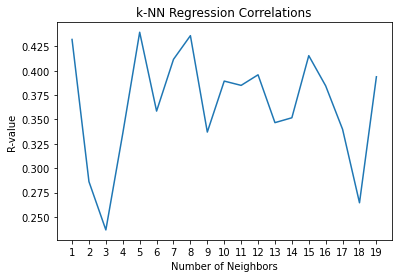

In [ ]:
plt.plot(range(1, max_neighbors), np.array(pearson)[:, 0])
plt.title("k-NN Regression Correlations")
plt.ylabel("R-value")
plt.xlabel("Number of Neighbors")
plt.xticks(range(1, max_neighbors, 1))

# 4-output Modeling

In [68]:
X_adi = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/adi_filled.csv")
X_gas = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/gas_filled.csv")
X_islet = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/islet_filled.csv")
X_liver = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/liver_filled.csv")
X_kid = pd.read_csv("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/kid_filled.csv")

In [70]:
X_adi = X_adi.iloc[:, 1:].to_numpy()
X_gas = X_gas.iloc[:, 1:].to_numpy()
X_islet = X_islet.iloc[:, 1:].to_numpy()
X_liver = X_liver.iloc[:, 1:].to_numpy()
X_kid = X_kid.iloc[:, 1:].to_numpy()

In [71]:
sex_adi = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/adi_mlratio_nqrank_clean_sex.csv", delimiter=",")
sex_gas = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/gas_mlratio_nqrank_clean_sex.csv", delimiter=",")
sex_islet = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/islet_mlratio_nqrank_clean_sex.csv", delimiter=",")
sex_liver = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/liver_mlratio_nqrank_clean_sex.csv", delimiter=",")
sex_kid = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/kid_mlratio_nqrank_clean_sex.csv", delimiter=",")

In [96]:
y_adi = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/adi_filled_glucose.csv", delimiter=",")
y_gas = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/gas_filled_glucose.csv", delimiter=",")
y_islet = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/islet_filled_glucose.csv", delimiter=",")
y_liver = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/liver_filled_glucose.csv", delimiter=",")
y_kid = np.loadtxt("/content/drive/MyDrive/ProjectX 2021/Code/Correlation Analysis/kid_filled_glucose.csv", delimiter=",")

In [98]:
X_adi_train, X_adi_test, y_adi_train, y_adi_test = train_test_split(X_adi, y_adi, test_size=1/7, random_state=123, stratify=sex_adi)
X_gas_train, X_gas_test, y_gas_train, y_gas_test = train_test_split(X_gas, y_gas, test_size=1/7, random_state=123, stratify=sex_gas)
X_islet_train, X_islet_test, y_islet_train, y_islet_test = train_test_split(X_islet, y_islet, test_size=1/7, random_state=123, stratify=sex_islet)
X_liver_train, X_liver_test, y_liver_train, y_liver_test = train_test_split(X_liver, y_liver, test_size=1/7, random_state=123, stratify=sex_liver)
X_kid_train, X_kid_test, y_kid_train, y_kid_test = train_test_split(X_kid, y_kid, test_size=1/7, random_state=123, stratify=sex_kid)

In [101]:
# Adipose
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_adi_train, y_adi_train)
  y_predict = neigh.predict(X_adi_test)
  print(n, ":", math.sqrt(mean_squared_error(y_adi_test, y_predict)), mean_absolute_percentage_error(y_adi_test, y_predict), pearsonr(y_adi_test.flatten(), y_predict.flatten()))

1 : 170.71352332147364 0.4432092053967432 (0.4795637429035865, 1.6493146847083015e-17)
2 : 147.0825031714502 0.39139578010009307 (0.569423086971086, 1.8274059897749623e-25)
3 : 136.3396191250113 0.37797211467667524 (0.6139095034057569, 2.157184386817636e-30)
4 : 131.14101578313858 0.3616059994046353 (0.6380295082853317, 2.0832682389886464e-33)
5 : 127.38177713399153 0.34723977118441623 (0.6625644541883354, 9.184897955938206e-37)
6 : 123.12513472759645 0.33998799988092104 (0.6900286768366601, 6.455604805877517e-41)
7 : 121.4210298679873 0.3405523007624396 (0.7022230981739481, 6.510472617295211e-43)
8 : 120.7237948370457 0.3444501182320925 (0.708689128627978, 5.167642213595622e-44)
9 : 121.01534107722823 0.3436499901904433 (0.7089679312839774, 4.625626313201624e-44)
10 : 121.05337156728972 0.34370435707987756 (0.70985553513317, 3.2477951718743625e-44)
11 : 121.58274121893427 0.34246792189137265 (0.7083658892909231, 5.87507004603195e-44)
12 : 121.08557897141978 0.3390969566242404 (0.71204

In [102]:
# Gastrocnemius
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_gas_train, y_gas_train)
  y_predict = neigh.predict(X_gas_test)
  print(n, ":", math.sqrt(mean_squared_error(y_gas_test, y_predict)), mean_absolute_percentage_error(y_gas_test, y_predict), pearsonr(y_gas_test.flatten(), y_predict.flatten()))

1 : 170.69646839597283 0.47061455345900677 (0.503132093027599, 2.2567205446932583e-19)
2 : 140.92072857434206 0.41063947236919807 (0.5961368977962808, 2.4814821210777926e-28)
3 : 142.94119703587265 0.41242291093530453 (0.5758090218058728, 3.983015190381441e-26)
4 : 138.61776797940522 0.40489265996575013 (0.5855701818966983, 3.634906578607119e-27)
5 : 132.97059773592804 0.39169210171895746 (0.6178843880735169, 7.1600867933107934e-31)
6 : 130.00547885209843 0.38336955324027483 (0.6318473182207942, 1.3090384674584223e-32)
7 : 130.73441019469658 0.3766331231703564 (0.6259750035603475, 7.221201854203777e-32)
8 : 129.4020959755017 0.38043219866787237 (0.6349954544284349, 5.1611982647389846e-33)
9 : 129.26654067573463 0.3755064418462537 (0.6355390955997083, 4.390116686928363e-33)
10 : 129.07492546063335 0.37937258369272625 (0.6368958388690009, 2.9273885624633553e-33)
11 : 127.08403729927636 0.3741803018333936 (0.6508507520162347, 4.0168936740188654e-35)
12 : 125.84429906616187 0.3679707440583

In [103]:
# Islet
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_islet_train, y_islet_train)
  y_predict = neigh.predict(X_islet_test)
  print(n, ":", math.sqrt(mean_squared_error(y_islet_test, y_predict)), mean_absolute_percentage_error(y_islet_test, y_predict), pearsonr(y_islet_test.flatten(), y_predict.flatten()))

1 : 152.81880773849895 0.37885633336519275 (0.5678523320069501, 1.2055976028561907e-25)
2 : 126.27360709437768 0.31631855442541035 (0.6710464367998077, 1.6039458404553623e-38)
3 : 124.56361673001665 0.3204558088719345 (0.672299591498221, 1.038898575779957e-38)
4 : 124.35554873808672 0.32149469983637724 (0.667581832054016, 5.270877933535793e-38)
5 : 120.49968198168486 0.3079051940576736 (0.6895649725392543, 2.0908181231448538e-41)
6 : 117.0076522749841 0.3032574663041308 (0.7096272284341586, 8.705365401055165e-45)
7 : 117.55500139332928 0.3030915886363658 (0.7069248753442471, 2.5810962064906505e-44)
8 : 116.31379935423794 0.30740258459247316 (0.7139861247148268, 1.468565477999203e-45)
9 : 116.39127809608279 0.3084921405539409 (0.7134380936272771, 1.840181812706955e-45)
10 : 113.7803906599903 0.30221082460630533 (0.7297874137145803, 1.7352557270706017e-48)
11 : 114.12957990142742 0.30541520159843455 (0.7275700795500157, 4.5979450099713326e-48)
12 : 112.1876511873128 0.3002454607397789 (0

In [104]:
# Liver
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_liver_train, y_liver_train)
  y_predict = neigh.predict(X_liver_test)
  print(n, ":", math.sqrt(mean_squared_error(y_liver_test, y_predict)), mean_absolute_percentage_error(y_liver_test, y_predict), pearsonr(y_liver_test.flatten(), y_predict.flatten()))

1 : 189.7071963078516 0.4440260015025329 (0.38090864812219805, 5.834710831178616e-11)
2 : 153.75110910127412 0.39068814115242295 (0.5157949104557337, 3.6535493302693824e-20)
3 : 139.24648040225262 0.3560786299861014 (0.6042580838732967, 7.358224974224224e-29)
4 : 136.66882928648369 0.3634398103494333 (0.6119097892738583, 9.61278488601588e-30)
5 : 136.65665358655124 0.37353704746620414 (0.6063608734697011, 4.229026415354881e-29)
6 : 136.04063587927232 0.36984591008241896 (0.608469487549594, 2.4167910562803638e-29)
7 : 135.97435020395517 0.3756309112439223 (0.6088855624238676, 2.16309180810336e-29)
8 : 139.28998308674744 0.3827845537826196 (0.5866344021648222, 6.52357660408535e-27)
9 : 137.2112620190412 0.37887069904449544 (0.6021590676129677, 1.2738014389635728e-28)
10 : 136.89356989416208 0.37820419609894357 (0.604433219183055, 7.027613564207929e-29)
11 : 137.7297809678665 0.3809965729797947 (0.597436415176559, 4.314609958847064e-28)
12 : 137.86591263262585 0.38510444698208285 (0.59536

In [105]:
# Kidney
for n in range(1, 21):
  neigh = KNeighborsRegressor(n_neighbors=n)
  neigh.fit(X_kid_train, y_kid_train)
  y_predict = neigh.predict(X_kid_test)
  print(n, ":", math.sqrt(mean_squared_error(y_kid_test, y_predict)), mean_absolute_percentage_error(y_kid_test, y_predict), pearsonr(y_kid_test.flatten(), y_predict.flatten()))

1 : 172.60279187058478 0.49973208135532265 (0.4834743584235951, 2.4356053992490516e-17)
2 : 155.0487604839258 0.45790892564441893 (0.5207649828243717, 2.6149370476287837e-20)
3 : 145.95064035793635 0.43985736257786634 (0.5554741366758646, 2.0195810223758972e-23)
4 : 144.376510414202 0.4367356584491271 (0.557116289254364, 1.4089113518891597e-23)
5 : 142.08863304801335 0.4391655741667055 (0.5696558916248284, 8.427976796376276e-25)
6 : 141.3562341293341 0.43618950072307067 (0.5730561812056362, 3.8456726669810542e-25)
7 : 140.76554351327252 0.44189432280021573 (0.5754602584077081, 2.1961229882972734e-25)
8 : 141.93533639306585 0.4479291496955195 (0.5682728039441949, 1.1566468127398771e-24)
9 : 140.99874650392042 0.4474535633642899 (0.5736785171150209, 3.327955905394445e-25)
10 : 138.76284703330893 0.44589276678268663 (0.5902209825210438, 6.351488071636421e-27)
11 : 139.19170358535283 0.4482922118688143 (0.5864258928790478, 1.6070172008938737e-26)
12 : 140.10096925965144 0.4472409673993588 

In [116]:
math.sqrt(mean_squared_error(y_kid_test[:, -1], y_predict[:, -1]))

131.20613815166132

In [113]:
y_predict[:, -1].shape

(68,)